In [1]:
from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow as tf

import nn

nn.enable_debug_eager_mode()
tf.random.set_seed(42)

In [2]:
data = nn.get_extern_data(
    nn.Data("data", dim_tags=[nn.batch_dim, nn.SpatialDim("time"), nn.FeatureDim("in", 5)]))
data, data.data.placeholder.shape

Metal device set to: Apple M1 Pro


2022-04-25 13:04:30.565466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-25 13:04:30.565584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<Tensor /'data:data' [B,T|'time'[B],F|F'in'(5)]>,
 TensorShape([Dimension(3), Dimension(16), Dimension(5)]))

In [3]:
linear = nn.Linear(nn.FeatureDim("linear-out", 10))
linear

<Linear>

In [4]:
out = linear(data)
out

<Tensor /'linear' [B,T|'time'[B],F|F'linear-out'(10)] via <Linear>>

In [5]:
list(linear.parameters())

[<Parameter 'parameter' [F'in'(5),F|F'linear-out'(10)] via 'variable'>,
 <Parameter 'parameter' [F|F'linear-out'(10)] via 'variable'>]

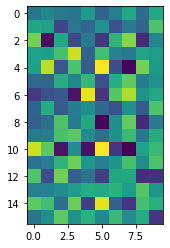

In [6]:
imshow(out.data.placeholder.numpy()[0])